<a href="https://colab.research.google.com/github/Khomiakov7706/SKAB/blob/master/draft_USD_RUB_MOEX_parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
pip install requests bs4

In [258]:
import requests # Модуль для обработки URL
from bs4 import BeautifulSoup # Модуль для работы с HTML
import time # Модуль для остановки программы
import smtplib # Модуль для работы с почтой

# Основной класс
class Currency:
	# Ссылка на нужную страницу
	DOLLAR_RUB = 'https://www.google.com/search?sxsrf=ALeKk01NWm6viYijAo3HXYOEQUyDEDtFEw%3A1584716087546&source=hp&ei=N9l0XtDXHs716QTcuaXoAg&q=%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80+%D0%BA+%D1%80%D1%83%D0%B1%D0%BB%D1%8E&oq=%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80+&gs_l=psy-ab.3.0.35i39i70i258j0i131l4j0j0i131l4.3044.4178..5294...1.0..0.83.544.7......0....1..gws-wiz.......35i39.5QL6Ev1Kfk4'
	# Заголовки для передачи вместе с URL
	headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'}

	current_converted_price = 0
	difference = 5 # Разница после которой будет отправлено сообщение на почту

	def __init__(self):
		# Установка курса валюты при создании объекта
		self.current_converted_price = float(self.get_currency_price().replace(",", "."))

	# Метод для получения курса валюты
	def get_currency_price(self):
		# Парсим всю страницу
		full_page = requests.get(self.DOLLAR_RUB, headers=self.headers)

		# Разбираем через BeautifulSoup
		soup = BeautifulSoup(full_page.content, 'html.parser')

		# Получаем нужное для нас значение и возвращаем его
		convert = soup.findAll("span", {"class": "DFlfde", "class": "SwHCTb", "data-precision": 2})
		return convert[0].text

	# Проверка изменения валюты
	def check_currency(self):
		currency = float(self.get_currency_price().replace(",", "."))
		if currency >= self.current_converted_price + self.difference:
			print("Курс сильно вырос, может пора что-то делать?")
			self.send_mail()
		elif currency <= self.current_converted_price - self.difference:
			print("Курс сильно упал, может пора что-то делать?")
			self.send_mail()

		print("Сейчас курс: 1 доллар = " + str(currency))
		time.sleep(10) # Засыпание программы на 3 секунды
		self.check_currency()

	# Отправка почты через SMTP
	def send_mail(self):
		server = smtplib.SMTP('smtp.gmail.com', 587)
		server.ehlo()
		server.starttls()
		server.ehlo()

		server.login('ВАША ПОЧТА', 'ПАРОЛЬ')

		subject = 'Currency mail'
		body = 'Currency has been changed!' 
		message = f'Subject: {subject}\n{body}'

		server.sendmail(
			'От кого',
			'Кому',
			message
		)
		server.quit()

# Создание объекта и вызов метода
#currency = Currency()
#currency.check_currency()

In [259]:
import requests # Модуль для обработки URL
from bs4 import BeautifulSoup # Модуль для работы с HTML
import time # Модуль для остановки программы
import smtplib # Модуль для работы с почтой

# Основной класс
class Currency:
	# Ссылка на нужную страницу
	DOLLAR_RUB = 'https://www.google.com/search?q=dollar+rub&newwindow=1&sxsrf=APq-WBui3sbSOuuyfTXw5Mjto6qk-q_kxQ%3A1649591754928&source=hp&ei=ysVSYv3sM_OJxc8Pv-i5-AU&iflsig=AHkkrS4AAAAAYlLT2q2PW2K6YiFWIVQferuDhC7m4434&ved=0ahUKEwj9-cmUuIn3AhXzRPEDHT90Dl8Q4dUDCAw&uact=5&oq=dollar+rub&gs_lcp=Cgdnd3Mtd2l6EAMyCggAEMsBEEYQggIyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQgAQyBQgAEMsBMgUIABDLATIFCAAQgAQ6BAgjECc6DgguEIAEEMcBEKMCENQCOgUILhCABDoLCC4QgAQQxwEQ0QM6DgguEIAEEMcBENEDENQCOgQIABBDOgcILhDUAhBDOgcIIxDqAhAnOgsILhCABBDHARCjAjoICC4QgAQQ1AI6CwguEIAEEMcBEK8BOgcIABCABBAKOgcILhCABBAKOgoILhDHARDRAxBDOgQILhBDOgoILhDHARCjAhBDOgcIABDJAxBDUABYrzFgrTRoBXAAeACAAXmIAeEIkgEEMTQuMZgBAKABAbABCg&sclient=gws-wiz'
	# Заголовки для передачи вместе с URL
	headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'}

	current_converted_price = 0
	difference = 5 # Разница после которой будет отправлено сообщение на почту

	def __init__(self):
		# Установка курса валюты при создании объекта
		self.current_converted_price = float(self.get_currency_price().replace(",", "."))

	# Метод для получения курса валюты
	def get_currency_price(self):
		# Парсим всю страницу
		full_page = requests.get(self.DOLLAR_RUB, headers=self.headers)

		# Разбираем через BeautifulSoup
		soup = BeautifulSoup(full_page.content, 'html.parser')

		# Получаем нужное для нас значение и возвращаем его
		convert = soup.findAll("span", {"class": "DFlfde", "class": "SwHCTb", "data-precision": 2})
		return convert[0].text

	# Проверка изменения валюты
	def check_currency(self):
		currency = float(self.get_currency_price().replace(",", "."))
		if currency >= self.current_converted_price + self.difference:
			print("Курс сильно вырос, может пора что-то делать?")
			self.send_mail()
		elif currency <= self.current_converted_price - self.difference:
			print("Курс сильно упал, может пора что-то делать?")
			self.send_mail()

		print("Сейчас курс: 1 доллар = " + str(currency))
		time.sleep(10) # Засыпание программы на 10 секунд
		self.check_currency()

	# Отправка почты через SMTP
	def send_mail(self):
		server = smtplib.SMTP('smtp.gmail.com', 587)
		server.ehlo()
		server.starttls()
		server.ehlo()

		server.login('ВАША ПОЧТА', 'ПАРОЛЬ')

		subject = 'Currency mail'
		body = 'Currency has been changed!' 
		message = f'Subject: {subject}\n{body}'

		server.sendmail(
			'От кого',
			'Кому',
			message
		)
		server.quit()

# Создание объекта и вызов метода


In [260]:
#currency = Currency()
#currency.check_currency()

# Из исходного кода [страницы Finam](https://www.finam.ru/profile/mosbirzha-valyutnyj-rynok/usdrubtom-usd-rub/export/?market=45&em=182400&token=03AGdBq27DuogTQoyynyc27rTTQClZsi9-EBxeMbo3fau_5sdu0cjMGP0bRqO82XHU_t7wTiE4TbbasAVSjnKN7Y2DqtZDZuM4HigoH2TozLqR_gCzs8rh8o4AF20mto16Rv0Ld6UBAumszFZkbYBqc1ofD_onpudH9msQrXyqM72Dei5EMt7jUrLBsQlboMPK0a94oC5TFjPQh-qjfwb1JY7s_esOV6GGYQPO7_rcOMy8X9k8AU1uw6FSOvWYzFARaJ6JnN4RVlQiSpnWSCeSSoGin00riRXMFZAU67k09p4rJdnQBsrBglxo941peEj9sw5Wf9iOgX4GhEtccOddp3nmiQbTsbVMABbfB0_-hccRHSeIn8p7bx6tg2AW_mpWiSt4WjOdFhImAGMMKF05cdSUwHtrcsJIWgGu4Rj6Uwl8xwo8AWHHOAMyKU2JHN-LyWiCoRSg9mZgPDQw6CrwEnxDJDr8LR3FAg&code=USD000UTSTOM&apply=0&df=8&mf=3&yf=2022&from=08.04.2022&dt=10&mt=3&yt=2022&to=10.04.2022&p=6&f=USD000UTSTOM_220408_220410&e=.csv&cn=USD000UTSTOM&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1) с курсом $ USDRUB_TOM 


Finam.IssuerProfile.Main.issue = {
                                    "quote": {
                                        "id": 182400,
                                        "code": "USD000UTSTOM",
                                        "fullUrl": "mosbirzha-valyutnyj-rynok/usdrubtom-usd-rub",

                                        "title": "USDRUB_TOM",
                                        "decp": 4,
                                        "testDriveEnabled": false,
                                        "market": {
                                            "id": 45,
                                            "title": "МосБиржа валютный рынок",

                                            "volumeEnabled": true
                                        },
                                        "info": {
                                            "decp": 4,
                                            "last": 76.08,
                                            "pchange": 0.43564,
                                            "change": 0.33,
                                            "bid": null,
                                            "ask": null,
                                            "open": 75.75,
                                            "high": 76.26,
                                            "low": 71,
                                            "close": 75.75,
                                            "volume": 1344670000,
                                            "date": "08.04.2022 18:59:52",
                                            "weekMin": 71,
                                            "weekMax": 85.315,
                                            "monthMin": 71,
                                            "monthMax": 121.5275,
                                            "yearMin": 69.21,
                                            "yearMax": 121.5275,
                                            "currency": null,
                                            "volumeCode": null
                                        },

Для USDRUB_TOM:

market = 45, 

em = 182400, 

code = USDRUB_TOM

# Parameters:

market, em, code – об этих параметрах, упоминал ранее, при обращении к функции их значения будут приниматься из файла.

df, mf, yf, from, dt, mt, yt, to – это параметры времени.

p — период котировок (тики, 1 мин., 5 мин., 10 мин., 15 мин., 30 мин., 1 час, 1 день, 1 неделя, 1 месяц)

e – расширение получаемого файла; возможны варианты — .txt либо .csv
dtf — формат даты (1 — ггггммдд, 2 — ггммдд, 3 — ддммгг, 4 — дд/мм/гг, 5 — мм/дд/гг)

tmf — формат времени (1 — ччммсс, 2 — ччмм, 3 — чч: мм: сс, 4 — чч: мм)

MSOR — выдавать время (0 — начала свечи, 1 — окончания свечи)

mstimever — выдавать время (НЕ московское — mstimever=0; московское — mstime='on', mstimever='1')

sep — параметр разделитель полей (1 — запятая (,), 2 — точка (.), 3 — точка с запятой (;), 4 — табуляция (»), 5 — пробел ( ))

sep2 — параметр разделитель разрядов (1 — нет, 2 — точка (.), 3 — запятая (,), 4 — пробел ( ), 5 — кавычка ('))

datf — Перечень получаемых данных (#1 — TICKER, PER, DATE, TIME, OPEN, HIGH, LOW, CLOSE, VOL; #2 — TICKER, PER, DATE, TIME, OPEN, HIGH, LOW, CLOSE; #3 — TICKER, PER, DATE, TIME, CLOSE, VOL; #4 — TICKER, PER, DATE, TIME, CLOSE; #5 — DATE, TIME, OPEN, HIGH, LOW, CLOSE, VOL; #6 — DATE, TIME, LAST, VOL, ID, OPER).

at — добавлять заголовок в файл (0 — нет, 1 — да)

In [328]:
from urllib.request import urlopen


code='USD000UTSTOM';
e='.csv';
market='45'
em='182400';
p='3';
yf='2022';
yt='2022';
month_start='04';
day_start='08';
month_end='04';
day_end='08';
dtf='4';
tmf='3';
MSOR='1';
mstime='on'
mstimever='1'
sep='1';
sep2='2';
datf='1';
at='1';
token = '03AGdBq24ovEJd8iyoRM0KqneYCBee_4L_fk3LvgobJXZRH0DU2N98U_Q-FCZ90ToKmFgwuSQ_CyIQWt4n4uy4T6LOEICjsb2x24qFOFhs6jO6NjeCgco1CBCeF43vHINO4Mk4DGY7DVMVfwT691aQYzm3Xx-S1eG0gPT0A5LFVbeFdsCaNDl73l0anIPQDojRZy5tQNj5UXZF5iRP7ySz3cK-mR5SsEX5ZFCbfgu1B1p7wDM2YkByjAVIYQX5B2lYUxGlJemOPm8mTybyYboTSnN6fV8gk2wPUMJ9JeWjf9mldjKWpy-cVEtE57_Pj4nrTNhq9cDhDwh79yZXL6rNl5gHobsbCPdDVPkKGcL-Xfr_4M0FlhkhDl9RGX4bpoPk9sdBXnNm2jhFMtlDf8s6RTj3BlifiMXUrqLOhtnoKoWsDr2jkHT_lHWYoWSrniN8ApINCYNPtvUbUDLVQEx2xczp-t0HGN6Jhg'

year_start=yf[2:];
year_end=yt[2:];
mf=(int(month_start.lstrip('0')))-1;
mt=(int(month_end.lstrip('0')))-1;
df=(int(day_start.lstrip('0')))-1;
dt=(int(day_end.lstrip('0')))-1;



In [329]:
print(yf)
print(mf)
print(df)
print(month_start)
print(day_start)
print(year_start)

2022
3
7
04
08
22


In [330]:
#weblink = 'https://export.finam.ru/export9.out?market='+str(market)+'&em='+str(em)+'&token='+str(token)+'&code='+str(code)+'&apply=0&df='+str(df)+'&mf='+str(mf)+'&yf='+str(yf)+'&from='+str(day_start)+'.'+str(month_start)+'.'+str(yf)+'&dt='+str(dt)+'&mt='+str(mt)+'&yt='+str(yt)+'&to='+str(day_end)+'.'+str(month_end)+'.'+str(yt)+'&p='+str(p)+'&f='+str(code)+'_'+str(year_start)+str(month_start)+str(day_start)+'_'+str(year_end)+str(month_end)+str(day_end)+'&e=.'+str(e)+'&cn='+str(code)+'&dtf='+str(dtf)+'&tmf='+str(tmf)+'&MSOR='+str(MSOR)+'&mstime='+str(mstime)+'&mstimever='+str(mstimever)+'&sep='+str(sep)+'&sep2='+str(sep2)+'&datf='+str(datf)+'&at='+str(at)
weblink = 'https://export.finam.ru/export9.out?market='+str(market)+'&em='+str(em)+'&token=&code='+str(code)+'&apply=0&df='+str(df)+'&mf='+str(mf)+'&yf='+str(yf)+'&from='+str(day_start)+'.'+str(month_start)+'.'+str(yf)+'&dt='+str(dt)+'&mt='+str(mt)+'&yt='+str(yt)+'&to='+str(day_end)+'.'+str(month_end)+'.'+str(yt)+'&p='+str(p)+'&f='+str(code)+'_'+str(year_start)+str(month_start)+str(day_start)+'_'+str(year_end)+str(month_end)+str(day_end)+'&e=.'+str(e)+'&cn='+str(code)+'&dtf='+str(dtf)+'&tmf='+str(tmf)+'&MSOR='+str(MSOR)+'&mstime='+str(mstime)+'&mstimever='+str(mstimever)+'&sep='+str(sep)+'&sep2='+str(sep2)+'&datf='+str(datf)+'&at='+str(at)
#weblink = 'https://export.finam.ru/export9.out?market=45&em=182400&token=&code=USD000UTSTOM&apply=0&df=8&mf=3&yf=2022&from=08.04.2022&dt=10&mt=3&yt=2022&to=10.04.2022&p=6&f=USD000UTSTOM_220408_220410&e=.csv&cn=USD000UTSTOM&dtf=4&tmf=3&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=2&datf=1&at=1'
#weblink = 'https://export.finam.ru/export9.out?market=1&em=175924&token=03AGdBq27DuogTQoyynyc27rTTQClZsi9-EBxeMbo3fau_5sdu0cjMGP0bRqO82XHU_t7wTiE4TbbasAVSjnKN7Y2DqtZDZuM4HigoH2TozLqR_gCzs8rh8o4AF20mto16Rv0Ld6UBAumszFZkbYBqc1ofD_onpudH9msQrXyqM72Dei5EMt7jUrLBsQlboMPK0a94oC5TFjPQh-qjfwb1JY7s_esOV6GGYQPO7_rcOMy8X9k8AU1uw6FSOvWYzFARaJ6JnN4RVlQiSpnWSCeSSoGin00riRXMFZAU67k09p4rJdnQBsrBglxo941peEj9sw5Wf9iOgX4GhEtccOddp3nmiQbTsbVMABbfB0_-hccRHSeIn8p7bx6tg2AW_mpWiSt4WjOdFhImAGMMKF05cdSUwHtrcsJIWgGu4Rj6Uwl8xwo8AWHHOAMyKU2JHN-LyWiCoRSg9mZgPDQw6CrwEnxDJDr8LR3FAg&code=POLY&apply=0&df=8&mf=3&yf=2022&from=08.04.2022&dt=10&mt=3&yt=2022&to=10.04.2022&p=6&f=POLY_220408_220410&e=.csv&cn=USDRUB&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'}
page = requests.get(weblink, headers=headers)
page_url = page.url

In [331]:
page.text

'<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\r\nUSD000UTSTOM,5,07/04/22,10:00:00,79.7200000,79.7200000,79.7200000,79.7200000,569.000\r\nUSD000UTSTOM,5,07/04/22,10:05:00,79.7900000,80.0000000,78.5975000,78.8850000,21.743.000\r\nUSD000UTSTOM,5,07/04/22,10:10:00,78.9650000,79.0000000,77.8000000,77.8000000,16.030.000\r\nUSD000UTSTOM,5,07/04/22,10:15:00,77.7925000,77.9900000,75.2000000,76.8950000,46.736.000\r\nUSD000UTSTOM,5,07/04/22,10:20:00,76.7475000,76.9175000,75.5000000,75.7575000,17.320.000\r\nUSD000UTSTOM,5,07/04/22,10:25:00,75.7475000,75.8800000,74.2625000,75.3150000,27.618.000\r\nUSD000UTSTOM,5,07/04/22,10:30:00,75.3150000,76.0675000,75.1925000,76.0000000,20.526.000\r\nUSD000UTSTOM,5,07/04/22,10:35:00,76.0000000,76.3800000,75.8900000,76.2900000,22.122.000\r\nUSD000UTSTOM,5,07/04/22,10:40:00,76.2900000,76.3325000,76.1000000,76.3000000,9.259.000\r\nUSD000UTSTOM,5,07/04/22,10:45:00,76.3000000,76.5975000,76.2025000,76.4500000,11.946.000\r\nUSD000UTSTOM,5,07/04/22,10:

In [314]:
#'https://export.finam.ru/export9.out?market='+str(market)+'&em='+str(em)+'&token='+str(token)+'&code='+str(code)+'&apply=0&df='+str(df)+'&mf='+str(mf)+'&yf='+str(yf)+'&from='+str(day_start)+'.'+str(month_start)+'.'+str(yf)+'&dt='+str(dt)+'&mt='+str(mt)+'&yt='+str(yt)+'&to='+str(day_end)+'.'+str(month_end)+'.'+str(yt)+'&p='+str(p)+'&f='+str(code)+'_'+str(year_start)+str(month_start)+str(day_start)+'_'+str(year_end)+str(month_end)+str(day_end)+'&e=.'+str(e)+'&cn='+str(code)+'&dtf='+str(dtf)+'&tmf='+str(tmf)+'&MSOR='+str(MSOR)+'&mstime='+str(mstime)+'&mstimever='+str(mstimever)+'&sep='+str(sep)+'&sep2='+str(sep2)+'&datf='+str(datf)+'&at='+str(at) == 'https://export.finam.ru/export9.out?market=45&em=182400&token=&code=USD000UTSTOM&apply=0&df=8&mf=3&yf=2022&from=08.04.2022&dt=10&mt=3&yt=2022&to=10.04.2022&p=6&f=USD000UTSTOM_220408_220410&e=.csv&cn=USD000UTSTOM&dtf=4&tmf=3&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=2&datf=1&at=1'

In [ ]:
#print('https://export.finam.ru/export9.out?market=45&em=182400&token=&code=USD000UTSTOM&apply=0&df=8&mf=3&yf=2022&from=08.04.2022&dt=10&mt=3&yt=2022&to=10.04.2022&p=6&f=USD000UTSTOM_220408_220410&e=.csv&cn=USD000UTSTOM&dtf=4&tmf=3&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=2&datf=1&at=1')
#print('https://export.finam.ru/export9.out?market='+str(market)+'&em='+str(em)+'&token=&code='+str(code)+'&apply=0&df='+str(df)+'&mf='+str(mf)+'&yf='+str(yf)+'&from='+str(day_start)+'.'+str(month_start)+'.'+str(yf)+'&dt='+str(dt)+'&mt='+str(mt)+'&yt='+str(yt)+'&to='+str(day_end)+'.'+str(month_end)+'.'+str(yt)+'&p='+str(p)+'&f='+str(code)+'_'+str(year_start)+str(month_start)+str(day_start)+'_'+str(year_end)+str(month_end)+str(day_end)+'&e=.'+str(e)+'&cn='+str(code)+'&dtf='+str(dtf)+'&tmf='+str(tmf)+'&MSOR='+str(MSOR)+'&mstime='+str(mstime)+'&mstimever='+str(mstimever)+'&sep='+str(sep)+'&sep2='+str(sep2)+'&datf='+str(datf)+'&at='+str(at))

In [283]:
#'df=8&mf=3&yf=2022' == 'df='+str(df)+'&mf='+str(mf)+'&yf='+str(yf)
#print(str(e)+'&cn='+str(code)+'&dtf='+str(dtf)+'&tmf='+str(tmf)+'&MSOR='+str(MSOR)+'&mstime='+str(mstime)+'&mstimever='+str(mstimever)+'&sep='+str(sep)+'&sep2='+str(sep2)+'&datf='+str(datf)+'&at='+str(at))

In [264]:
#str(e)+'&cn='+str(code)+'&dtf='+str(dtf)+'&tmf='+str(tmf)+'&MSOR='+str(MSOR)+'&mstime='+str(mstime)+'&mstimever='+str(mstimever)+'&sep='+str(sep)+'&sep2='+str(sep2)+'&datf='+str(datf)+'&at='+str(at) == '.csv&cn=USD000UTSTOM&dtf=4&tmf=3&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=2&datf=1&at=1'

In [265]:
#print('df='+str(df)+'&mf='+str(mf)+'&yf='+str(yf))
#print('.csv&cn=USD000UTSTOM&dtf=4&tmf=3&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=2&datf=1&at=1')

In [332]:
from io import StringIO
import pandas as pd

TESTDATA = StringIO(page.text)

data = pd.read_csv(TESTDATA, sep=",")

In [333]:
data.columns = data.columns.str.replace('<','')
data.columns = data.columns.str.replace('>','')

In [334]:
data.head()

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,USD000UTSTOM,5,07/04/22,10:00:00,79.7200,79.7200,79.7200,79.7200,569.000
1,USD000UTSTOM,5,07/04/22,10:05:00,79.7900,80.0000,78.5975,78.8850,21.743.000
2,USD000UTSTOM,5,07/04/22,10:10:00,78.9650,79.0000,77.8000,77.8000,16.030.000
3,USD000UTSTOM,5,07/04/22,10:15:00,77.7925,77.9900,75.2000,76.8950,46.736.000
4,USD000UTSTOM,5,07/04/22,10:20:00,76.7475,76.9175,75.5000,75.7575,17.320.000


In [335]:
import matplotlib.pyplot as plt

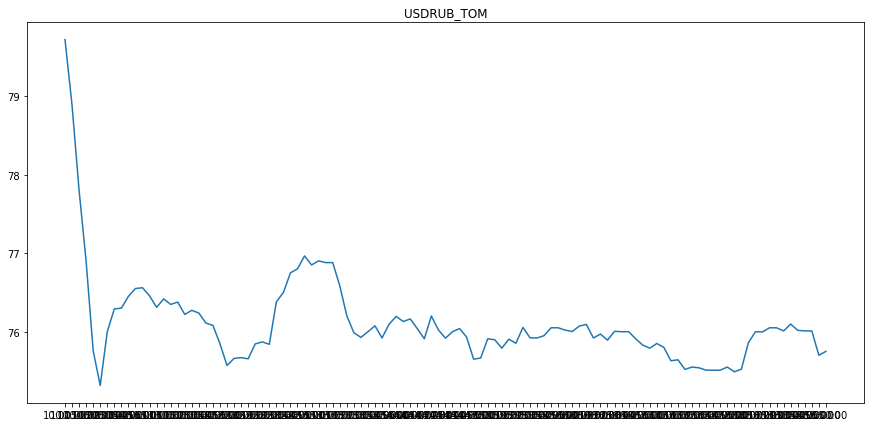

In [336]:
plt.figure(figsize=(15,7))

plt.plot(data['TIME'],data['CLOSE'])

plt.title('USDRUB_TOM')

plt.show()